# **Exploratory Data Analysis on Online Course Enrollment Data**


Import necessary class/methods in the packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [3]:
# also set a random state
rs = 123

### Load and explore the dataset


In [4]:
# Point to the datasets stored on local machine
course_genre_url = "course_genre.csv"
ratings_url = "ratings.csv"

In [5]:
course_df = pd.read_csv(course_genre_url)
ratings_df = pd.read_csv(ratings_url)

We will start by exploring the course genre dataset. Let's first check its columns/features name:


In [6]:
course_df.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

We can see from the above cell output that the columns represent some metadata about a course such as its id, title, and genres. We can see that the course genres are some popular topics related to machine learning, databases, app developments, etc.


We can also check how many unique courses we have in this dataset:


In [7]:
course_df.shape[0]

307

Then we can take a quick look at its header rows


In [8]:
course_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [9]:
course_df.dtypes

COURSE_ID          object
TITLE              object
Database            int64
Python              int64
CloudComputing      int64
DataAnalysis        int64
Containers          int64
MachineLearning     int64
ComputerVision      int64
DataScience         int64
BigData             int64
Chatbot             int64
R                   int64
BackendDev          int64
FrontendDev         int64
Blockchain          int64
dtype: object

As we can see, the `COURSE_ID` and `TITLE` are `str` datatypes and all the course genres are binary/int datatypes. Any genre column with value 1 means the course is associated with the course genre while 0 means the course is not.


For example, the following course `accelerating deep learning with gpu` is associated with genres `Python`, `MachineLearning`, and `DataScience`


In [10]:
course_df.iloc[1,]

COURSE_ID                                     ML0122EN
TITLE              accelerating deep learning with gpu
Database                                             0
Python                                               1
CloudComputing                                       0
DataAnalysis                                         0
Containers                                           0
MachineLearning                                      1
ComputerVision                                       0
DataScience                                          1
BigData                                              0
Chatbot                                              0
R                                                    0
BackendDev                                           0
FrontendDev                                          0
Blockchain                                           0
Name: 1, dtype: object

Next, let's focus on the course title column by trying to determine keywords in the titles. Those keywords in the titles may give us a more intuitive summary of what kind of courses we have in the dataset.


### Plot a Word Cloud from Course Titles


First, let's join all the title values into one string, then we can conveniently get a wordcloud from the big string:


In [11]:
titles = " ".join(title for title in course_df['TITLE'].astype(str))

In [12]:
titles[0:5]

'robot'

We also want to filter common stop words and some less meaningful words:


In [13]:
# English Stopwords
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

Then, we create a ```WordCloud``` object and generate ```wordcloud``` from the titles.


In [14]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)

In [15]:
wordcloud.generate(titles)

We can use `plt.imshow()` method to visualize the generated wordcloud:


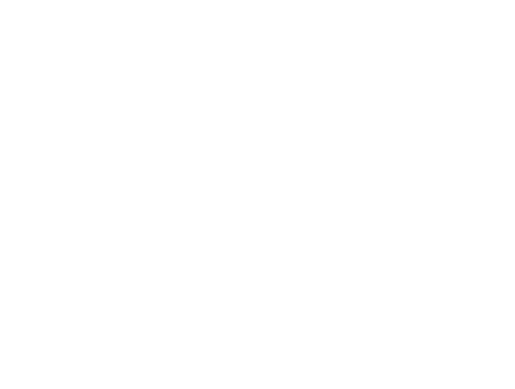

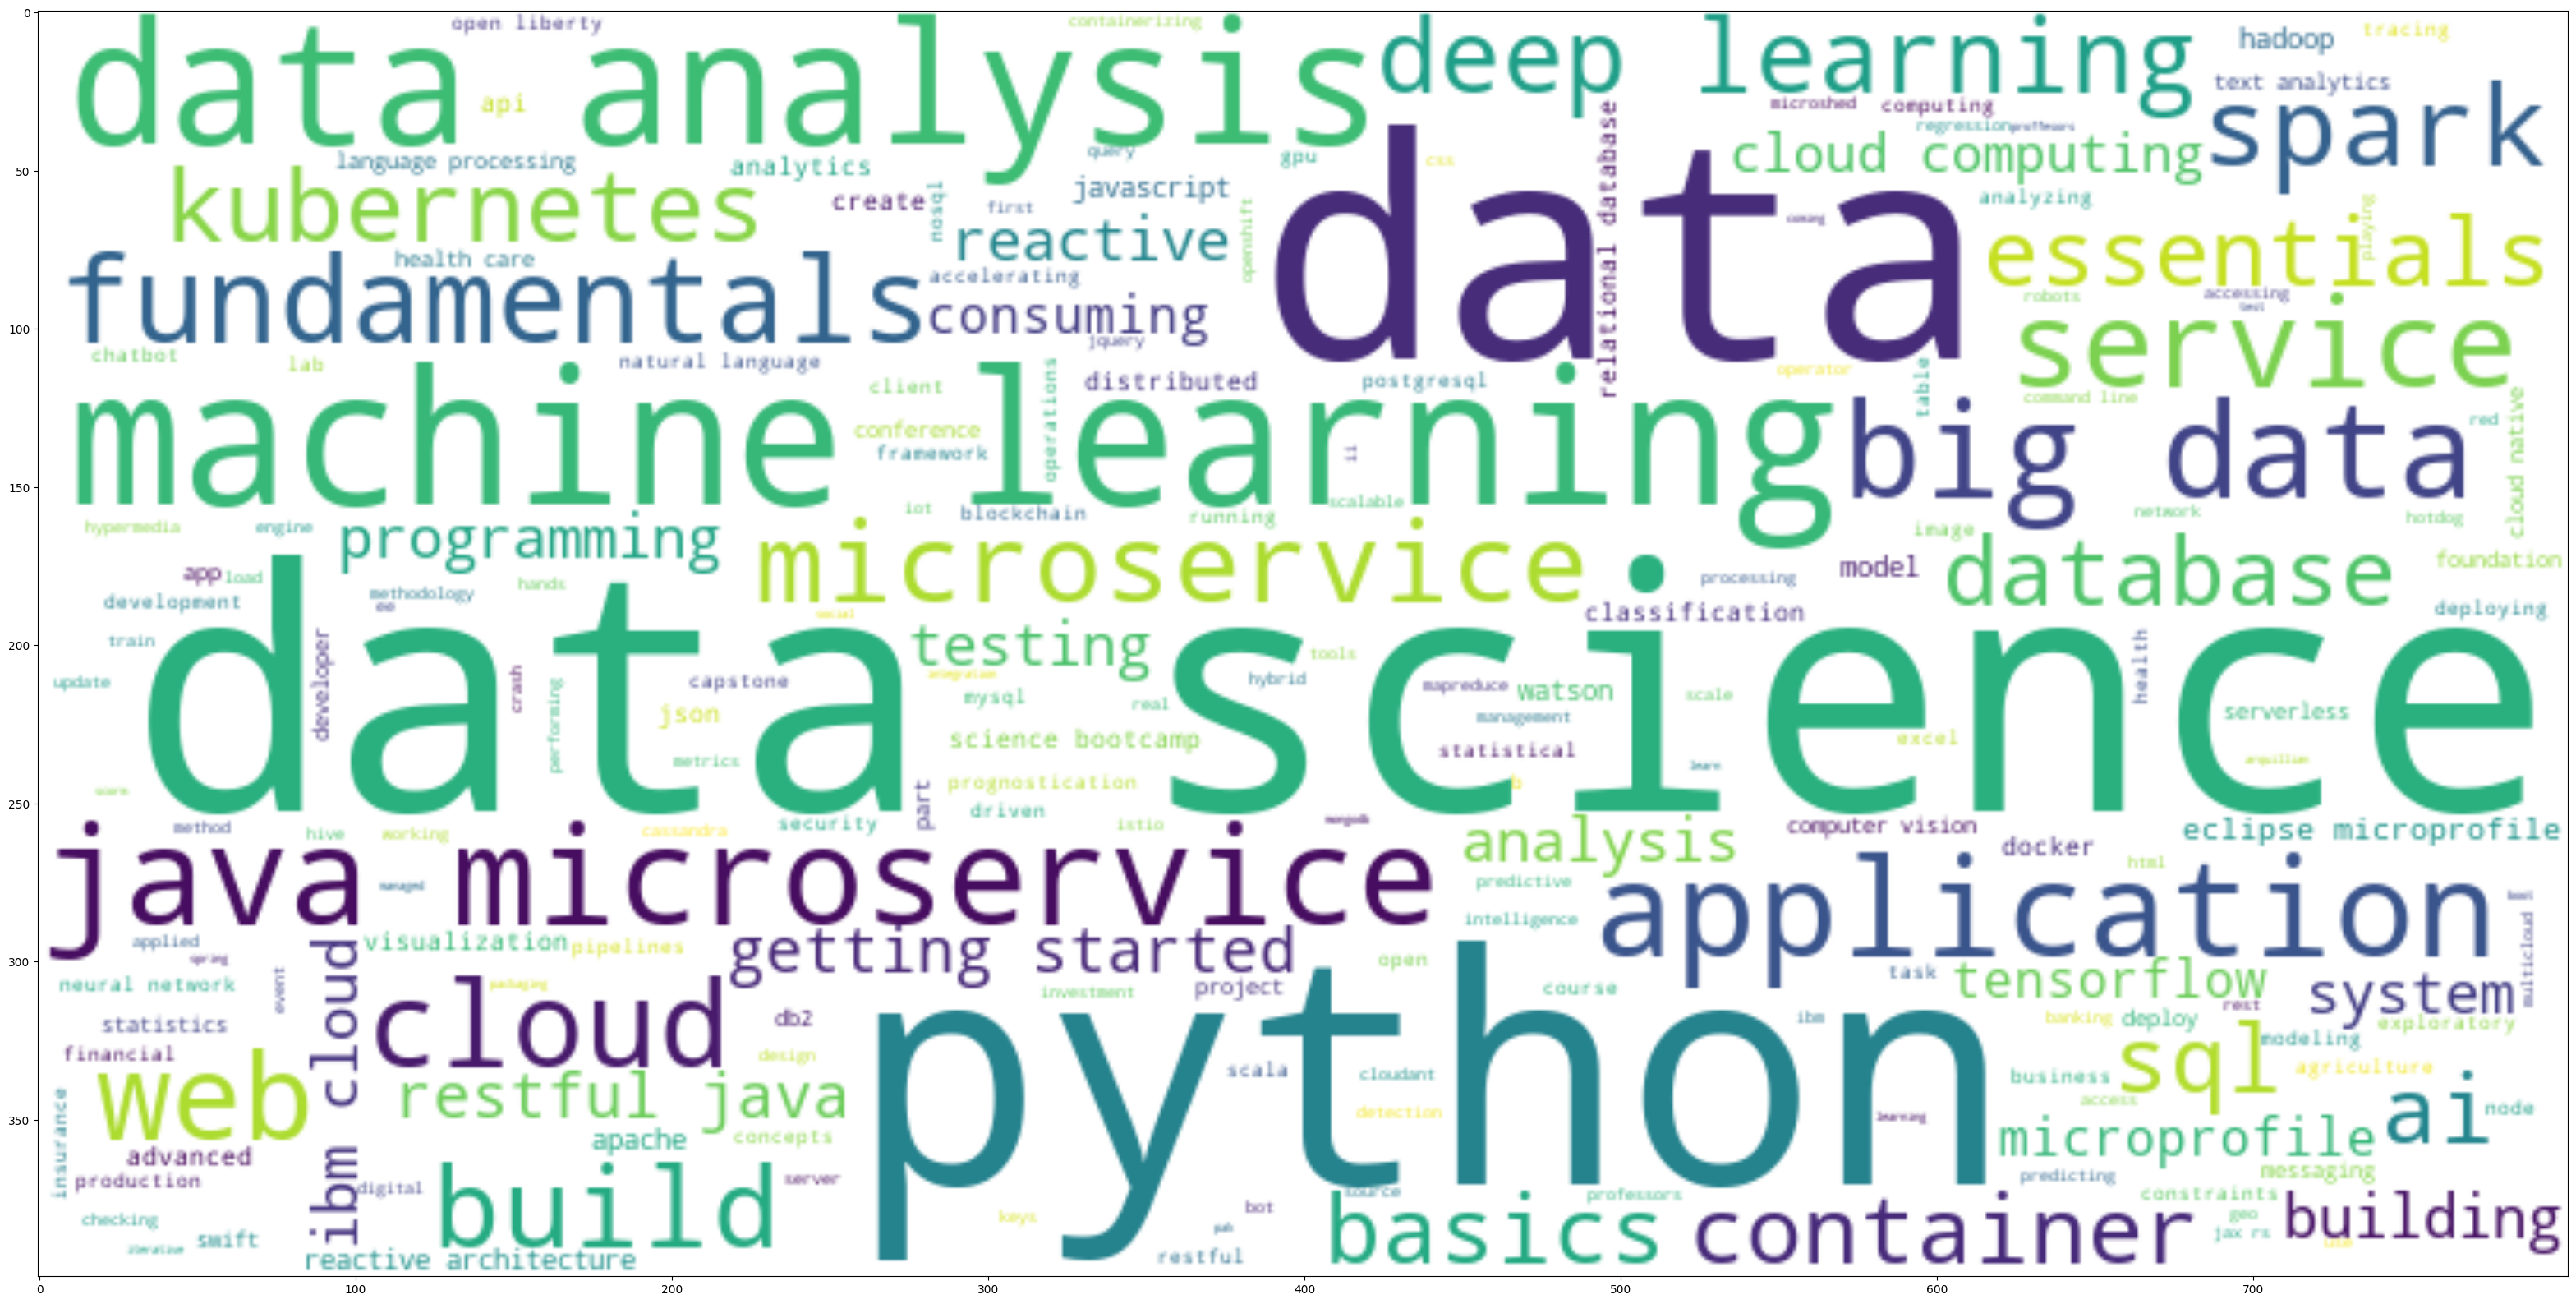

In [16]:
# Disable axis display
plt.axis("off")
# Create a new figure with a specified size
plt.figure(figsize=(40,20))
# Adjust the layout to ensure tight spacing
plt.tight_layout(pad=0)
# Display the word cloud image with bilinear interpolation
plt.imshow(wordcloud, interpolation='bilinear')
# Show the plot
plt.show()

As we can see from the ```wordcloud```,  there are many popular IT related keywords such as python, data science, machine learning, big data, ai, tensorflow, container, cloud, etc. By looking at these keywords, we should have a general understanding that the courses in the dataset are focused on demanding IT skills.


Next, you need to perform some more detailed analysis on the course dataset.


### TASK: Analyze Course Genres


What are the all machine learning related courses?


All courses with genre `MachineLearning` == 1_


In [17]:
ml_courses  = course_df[course_df['MachineLearning'] == 1]
ml_courses.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
15,DAI101EN,data ai essentials,0,0,0,0,0,1,0,0,0,0,0,0,0,0
19,HCC105EN,ybrid cloud conference ai pipelines lab,0,0,0,0,0,1,0,0,0,0,0,0,0,0
21,DS0132EN,data ai jumpstart your journey,0,0,0,0,0,1,0,0,0,0,0,0,0,0
24,BENTEST4,ai for everyone master the basics,0,0,0,0,0,1,0,0,0,0,0,0,0,0


Similarly, what are the scalable machine learning courses?


All courses with genres `MachineLearning` == 1 and `BigData` == 1_


In [18]:
bd_courses  =ml_courses[ml_courses['BigData'] == 1]
bd_courses

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
46,GPXX0BUBEN,insurance risk assessment with montecarlo meth...,0,0,0,0,0,1,0,0,1,0,0,0,0,0
59,TA0106EN,text analytics at scale,0,0,0,0,0,1,0,1,1,0,0,0,0,0
184,BD0221EN,spark mllib,0,0,0,0,0,1,0,0,1,0,0,0,0,0
282,excourse69,machine learning with big data,0,0,0,0,0,1,0,0,1,0,0,0,0,0


<details>
    <summary>Click here for Hints</summary>

You can find them by using previously found dataset of all courses with genre `MachineLearning` == 1_ and finding all courses with `BigData` == 1_ . Indexes can be found by using:
    
    
```python
mouse_df['BigData'] == 1
```


In [19]:
genres = course_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

Given all the course genres, now let's calculate the course count for each genre. e.g., there are 69 courses that belong to the `MachineLearning` genre and 23 courses that belong to the `Python` genre. We also want to sort the genre count list to find the most popular course genres.


In [20]:
genre_sums = course_df[genres].sum(axis=0)
genre_sums = pd.DataFrame(genre_sums, columns = ['Count']).sort_values(by = "Count", ascending=False)

We can also visualize course genre counts using a bar chart:


The x-axis is the course genre and the y-axis is the course count per genre._


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14688\55985163.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(),rotation = 90)


[Text(0, 0, 'BackendDev'),
 Text(1, 0, 'MachineLearning'),
 Text(2, 0, 'Database'),
 Text(3, 0, 'DataAnalysis'),
 Text(4, 0, 'DataScience'),
 Text(5, 0, 'CloudComputing'),
 Text(6, 0, 'BigData'),
 Text(7, 0, 'Python'),
 Text(8, 0, 'FrontendDev'),
 Text(9, 0, 'Containers'),
 Text(10, 0, 'R'),
 Text(11, 0, 'ComputerVision'),
 Text(12, 0, 'Chatbot'),
 Text(13, 0, 'Blockchain')]

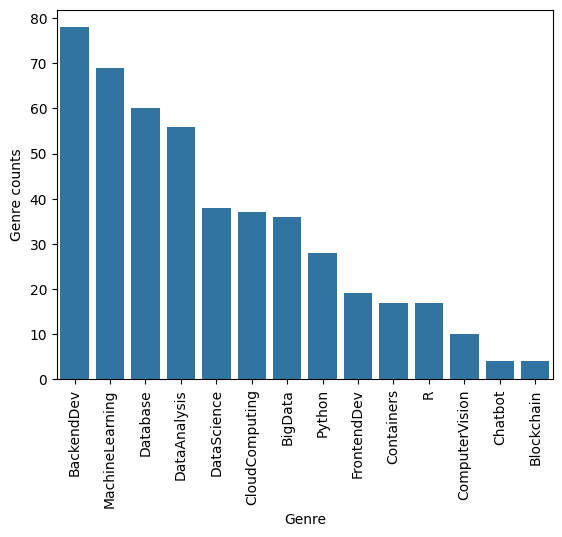

In [21]:
# WRITE YOUR CODE HERE
plt.ylabel("Genre counts")
plt.xlabel("Genre")
plot = sns.barplot(x=genre_sums.index, y="Count", data=genre_sums)
plot.set_xticklabels(plot.get_xticklabels(),rotation = 90) 

Now, you should have some solid understanding about all course metadata including the keywords in titles and popular course genres. Next, we will switch gears to exploring course learners related datasets.


###  TASK: Analyze Course Enrollments


Let's first take a look at the course enrollments dataset.


In [22]:
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,5
1,1342067,CL0101EN,3
2,1990814,ML0120ENv3,5
3,380098,BD0211EN,5
4,779563,DS0101EN,3


This dataset contains three colums, `user` representing a unique user id, `item` representing a course id, and `rating` representing the ratings given by the user.


In [23]:
ratings_df['rating'].unique()

array([5, 3, 4], dtype=int64)

The **rating** column consists of three potential values: 

- A rating of <code>5</code> signifies that users who have enrolled in the course find it excellent and have given it the highest rating, thus recommending it to other learners. 

- A rating of <code>4</code>, indicates that the enrolled users perceive the course as good and will recommend to the other learners,but suggest minor improvements. 

- A rating of <code>3</code>indicates that enrolled users find the course below expectations and need significant modifications.


Let's see how many ratings we have in the dataset:


In [24]:
ratings_df.shape[0]

233306

We have 233306 enrollments. In fact, each user is likely to interact with multiple items so let's find the rating counts for each user:


In [25]:
ratings_counts = ratings_df.groupby('user').size()
ratings_counts

user
2          61
4          44
5          59
7           1
8           3
           ..
2102054     8
2102356     1
2102680    11
2102983     1
2103039     1
Length: 33901, dtype: int64

Tthe statistics summary of the user enrollments.


In [26]:
ratings_counts.describe()

count    33901.000000
mean         6.881980
std          5.823548
min          1.000000
25%          2.000000
50%          6.000000
75%          9.000000
max         61.000000
dtype: float64

We can also get a histogram showing the enrollment distributions, e.g., how many users rated just 1 item or how many rated 10 items, etc.


<Axes: xlabel='Course enrollments', ylabel='User counts'>

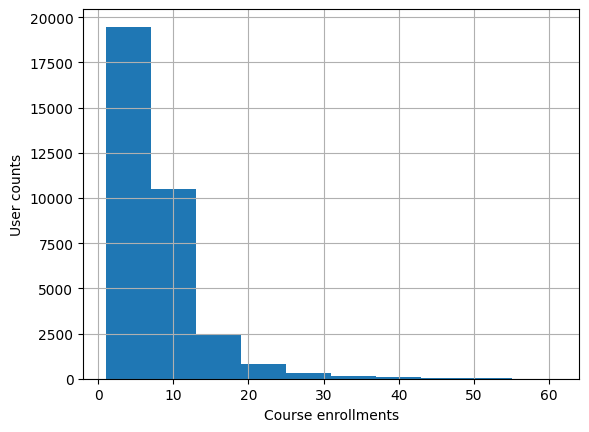

In [27]:
plt.ylabel("User counts")
plt.xlabel("Course enrollments")
ratings_counts.hist()

### Task: Find the Top-20 Most Popular Courses


Now we know how many items each user rated. Let's see the most popular 20 courses, i.e., items with the most rating counts.


In [28]:
top_courses = ratings_df.groupby('item').size().reset_index()
top_courses.columns=['course', 'Ratings']
top_courses = top_courses.sort_values(by='Ratings', ascending=False).reset_index(drop=True)
top_courses = top_courses[:20]

Now you may only see the item IDs which do not indicate what kind of courses they are. To make it more clear, we need to join the course titles in the course metadata dataset (`course_df`) so that we can identify what the most popular courses are immediately:


In [29]:
top_courses = top_courses.merge(course_df[['COURSE_ID', 'TITLE']], how='left', left_on='course', right_on='COURSE_ID')
top_courses = top_courses[['TITLE', 'Ratings']]
top_courses

,TITLE,Ratings
0,python for data science,14936
1,introduction to data science,14477
2,big data 101,13291
3,hadoop 101,10599
4,data analysis with python,8303
5,data science methodology,7719
6,machine learning with python,7644
7,spark fundamentals i,7551
8,data science hands on with open source tools,7199
9,blockchain essentials,6719


In [30]:
# Get the total course enrollments again
total = ratings_df.shape[0]
total

233306

In [31]:
top = 0

In [32]:
top = top_courses['Ratings'].values.sum()

In [33]:
print(f"Percentage of the top course enrollments {round((top * 100)/total, 2)}%")

Percentage of the top course enrollments 63.3%
